In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

from pickle import dump, load
from sklearn.preprocessing import MinMaxScaler
import time

path1 = "TCLab_MIMO_Control_onestep_lstm_20_20_1_1_1hr/"
# Road data to check
data = pd.read_pickle(path1 + 'TCLab_MIMO_Control_one_LSTM_20_20_1_1_1hr.pkl')

path2 = "TCLab_MIMO_Control_mul_trans_20_20_1_1_1hr/"
data2 = pd.read_pickle(path2 + 'TCLab_MIMO_Control_mul_trans_20_20_1_1_1hr.pkl')

path3 = "TCLab_PINN_Control_multistep_trans/"
data3 = pd.read_pickle(path3 + 'TCLab_PINN_Off_Control_Multistep_Trans.pkl')

path4 = "TCLab_PINN_Control_multistep_trans/"
data4 = pd.read_pickle(path4 + 'TCLab_PINN_On_Control_Multistep_Trans.pkl')

In [2]:
ind = data.index.to_numpy()
ind

array([   1,    2,    3, ..., 3598, 3599, 3600])

In [3]:
for i in range(150, len(data)):
    ind[i:] = ind[i:] + np.round(data["elapsed"][i])

In [4]:
data.set_index([pd.Index(ind)])


x = np.linspace(0,7200,num=115)

x2 = np.linspace(0,3600,num=115)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


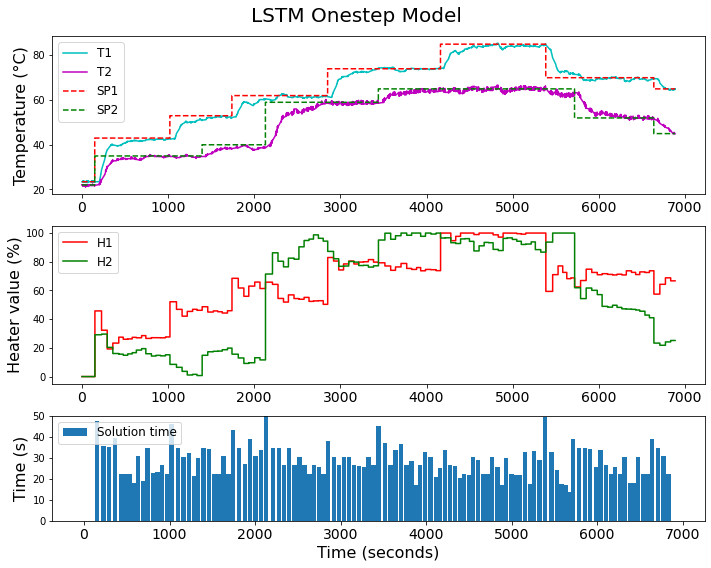

In [5]:

f, (a0, a1, a2) = plt.subplots(3, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 3, 2]})



# plt.subplot(3, 1, 1)
a0.plot(data["T1"], 'c-', label='T1')
a0.plot(data["T2"], 'm-', label='T2')
a0.step(data["SP1"], 'r--', label='SP1')
a0.step(data["SP2"], 'g--', label='SP2')
a0.legend(loc=2, fontsize=12)
a0.set_ylabel('Temperature (°C)', fontsize=16)
f.suptitle('LSTM Onestep Model', fontsize=20)
a0.tick_params(axis='x', labelsize=14)



# plt.subplot(3, 1, 2)
a1.step(data["H1"], 'r-', label='H1')
a1.step(data["H2"], 'g-', label='H2')
a1.set_ylabel('Heater value (%)', fontsize=16)
a1.legend(loc=2, fontsize=12)
a1.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 3)
a2.bar(data.index, data["elapsed"], label='Solution time', width=50)
plt.ylim(0, 50)
a2.legend(loc=2, fontsize=12)
a2.set_ylabel('Time (s)', fontsize=16)
a2.set_xlabel('Time (seconds)', fontsize=16)
a2.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('TCLab_Control_onestep_lstm_1hr.eps', format='eps')
plt.savefig('TCLab_Control_onestep_lstm_1hr.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


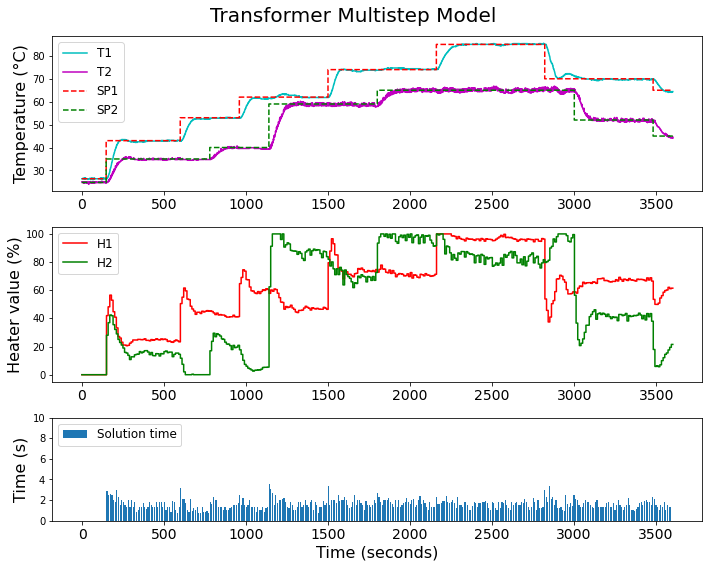

In [7]:
f, (a0, a1, a2) = plt.subplots(3, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 3, 2]})


# plt.subplot(3, 1, 1)
a0.plot(data2["T1"], 'c-', label='T1')
a0.plot(data2["T2"], 'm-', label='T2')
a0.step(data2["SP1"], 'r--', label='SP1')
a0.step(data2["SP2"], 'g--', label='SP2')
a0.legend(loc=2, fontsize=12)
a0.set_ylabel('Temperature (°C)', fontsize=16)
f.suptitle('Transformer Multistep Model', fontsize=20)
a0.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 2)
a1.step(data2["H1"], 'r-', label='H1')
a1.step(data2["H2"], 'g-', label='H2')
a1.set_ylabel('Heater value (%)', fontsize=16)
a1.legend(loc=2, fontsize=12)
a1.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 3)
a2.bar(data2.index, data2["elapsed"], label='Solution time', width=7)
plt.ylim(0, 10)
a2.set_ylabel('Time (s)', fontsize=16)
a2.set_xlabel('Time (seconds)', fontsize=16)
a2.legend(loc=2, fontsize=12)
a2.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('TCLab_Control_mul_trans_1hr.eps', format='eps')
plt.savefig('TCLab_Control_mul_trans_1hr.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


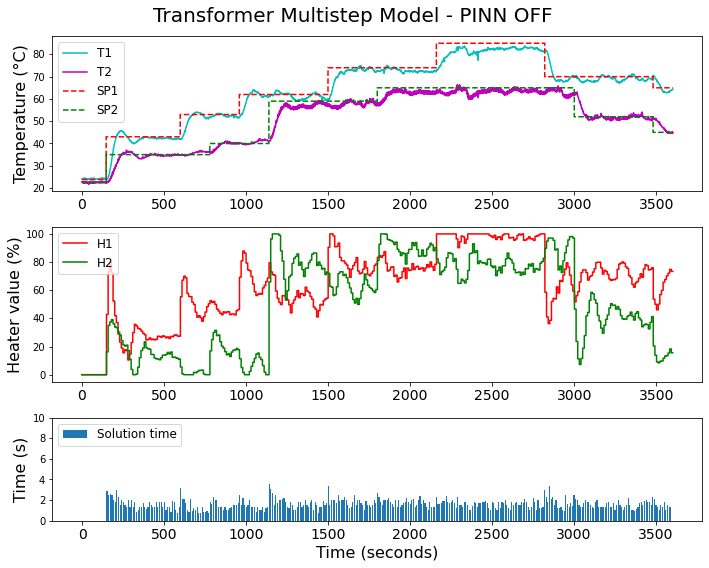

In [14]:
f, (a0, a1, a2) = plt.subplots(3, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 3, 2]})


# plt.subplot(3, 1, 1)
a0.plot(data3["T1"], 'c-', label='T1')
a0.plot(data3["T2"], 'm-', label='T2')
a0.step(data3["SP1"], 'r--', label='SP1')
a0.step(data3["SP2"], 'g--', label='SP2')
a0.legend(loc=2, fontsize=12)
a0.set_ylabel('Temperature (°C)', fontsize=16)
f.suptitle('Transformer Multistep Model - PINN OFF', fontsize=20)
a0.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 2)
a1.step(data3["H1"], 'r-', label='H1')
a1.step(data3["H2"], 'g-', label='H2')
a1.set_ylabel('Heater value (%)', fontsize=16)
a1.legend(loc=2, fontsize=12)
a1.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 3)
a2.bar(data3.index, data2["elapsed"], label='Solution time', width=7)
plt.ylim(0, 10)
a2.set_ylabel('Time (s)', fontsize=16)
a2.set_xlabel('Time (seconds)', fontsize=16)
a2.legend(loc=2, fontsize=12)
a2.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('TCLab_Control_PINN_OFF_mul_trans.eps', format='eps')
plt.savefig('TCLab_Control_PINN_OFF_mul_trans.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


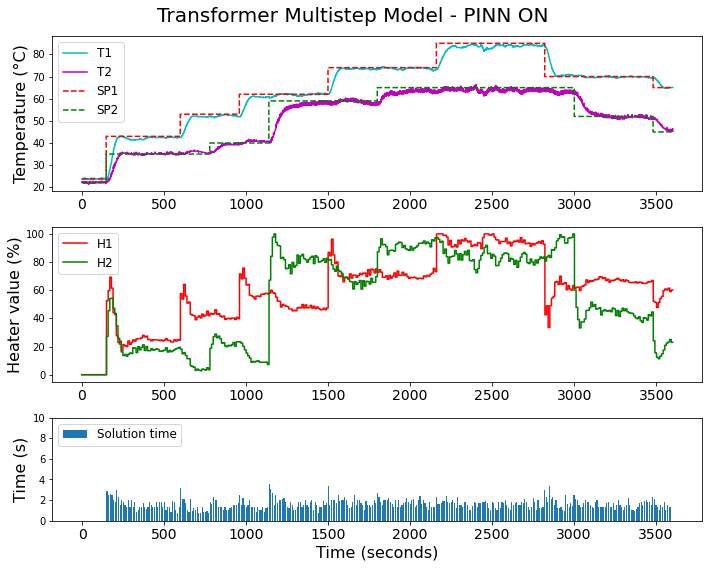

In [15]:
f, (a0, a1, a2) = plt.subplots(3, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 3, 2]})


# plt.subplot(3, 1, 1)
a0.plot(data4["T1"], 'c-', label='T1')
a0.plot(data4["T2"], 'm-', label='T2')
a0.step(data4["SP1"], 'r--', label='SP1')
a0.step(data4["SP2"], 'g--', label='SP2')
a0.legend(loc=2, fontsize=12)
a0.set_ylabel('Temperature (°C)', fontsize=16)
f.suptitle('Transformer Multistep Model - PINN ON', fontsize=20)
a0.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 2)
a1.step(data4["H1"], 'r-', label='H1')
a1.step(data4["H2"], 'g-', label='H2')
a1.set_ylabel('Heater value (%)', fontsize=16)
a1.legend(loc=2, fontsize=12)
a1.tick_params(axis='x', labelsize=14)


# plt.subplot(3, 1, 3)
a2.bar(data4.index, data2["elapsed"], label='Solution time', width=7)
plt.ylim(0, 10)
a2.set_ylabel('Time (s)', fontsize=16)
a2.set_xlabel('Time (seconds)', fontsize=16)
a2.legend(loc=2, fontsize=12)
a2.tick_params(axis='x', labelsize=14)


plt.tight_layout()

plt.savefig('TCLab_Control_PINN_ON_mul_trans.eps', format='eps')
plt.savefig('TCLab_Control_PINN_ON_mul_trans.png')

plt.show()